In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from kneed import KneeLocator
import seaborn as sns

df = pd.read_excel('datasets/AirQualityUCI.xlsx')

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


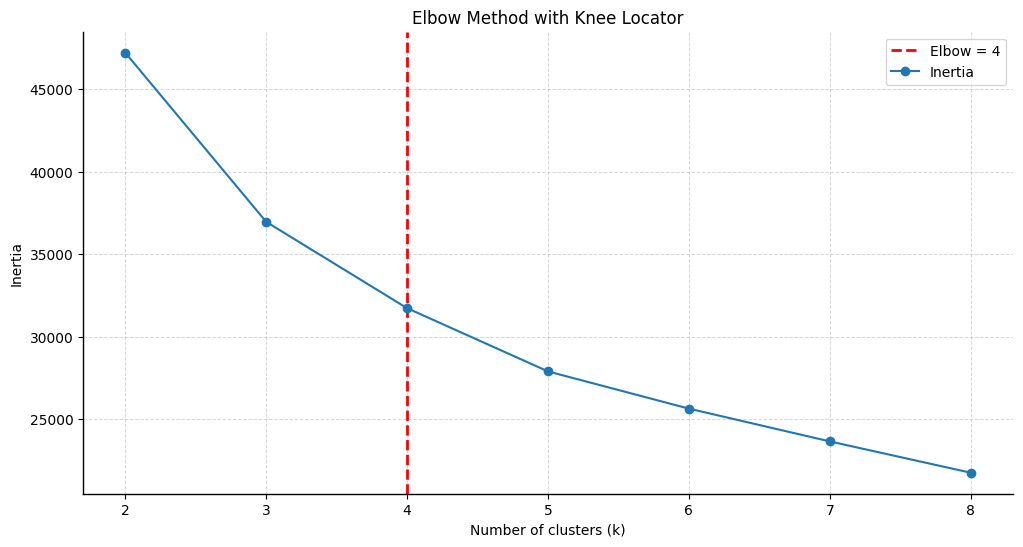

In [ ]:
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 
            'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

X = df[features]
X = X.replace(-200, np.nan).dropna()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute inertia for k values from 2 to 8
K_values = range(2, 9)
inertias = []
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Identify and plot the elbow point
kneedle = KneeLocator(K_values, inertias, curve='convex', direction='decreasing')
knee_point = kneedle.elbow
plt.figure(figsize=(12, 6))
plt.axvline(x=knee_point, color='red', linestyle='--', linewidth=2, label=f'Elbow = {knee_point}')
plt.plot(K_values, inertias, marker='o', linestyle='-', label='Inertia')

# Customize plot appearance
plt.grid(True, which='major', linestyle='--', linewidth=0.7, alpha=0.5)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)

# Add labels and title
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method with Knee Locator')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, silhouette={score:.3f}")

k=2, silhouette=0.291
k=3, silhouette=0.263
k=4, silhouette=0.243
k=5, silhouette=0.235
k=6, silhouette=0.228
k=7, silhouette=0.219
k=8, silhouette=0.220


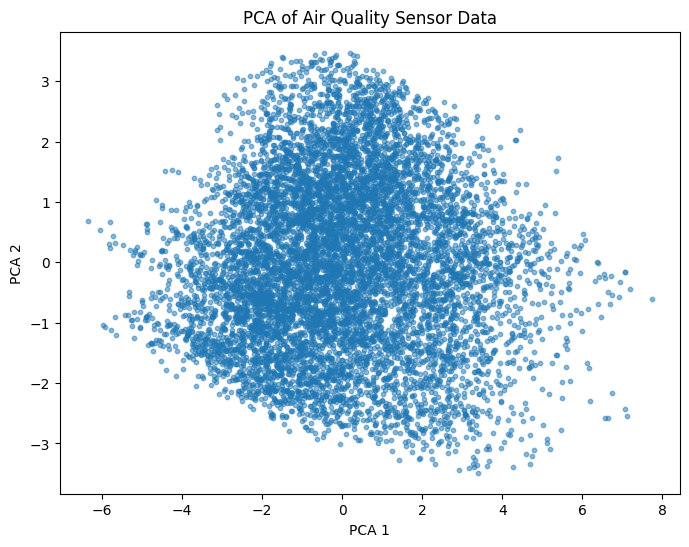

In [35]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Air Quality Sensor Data')
plt.show()



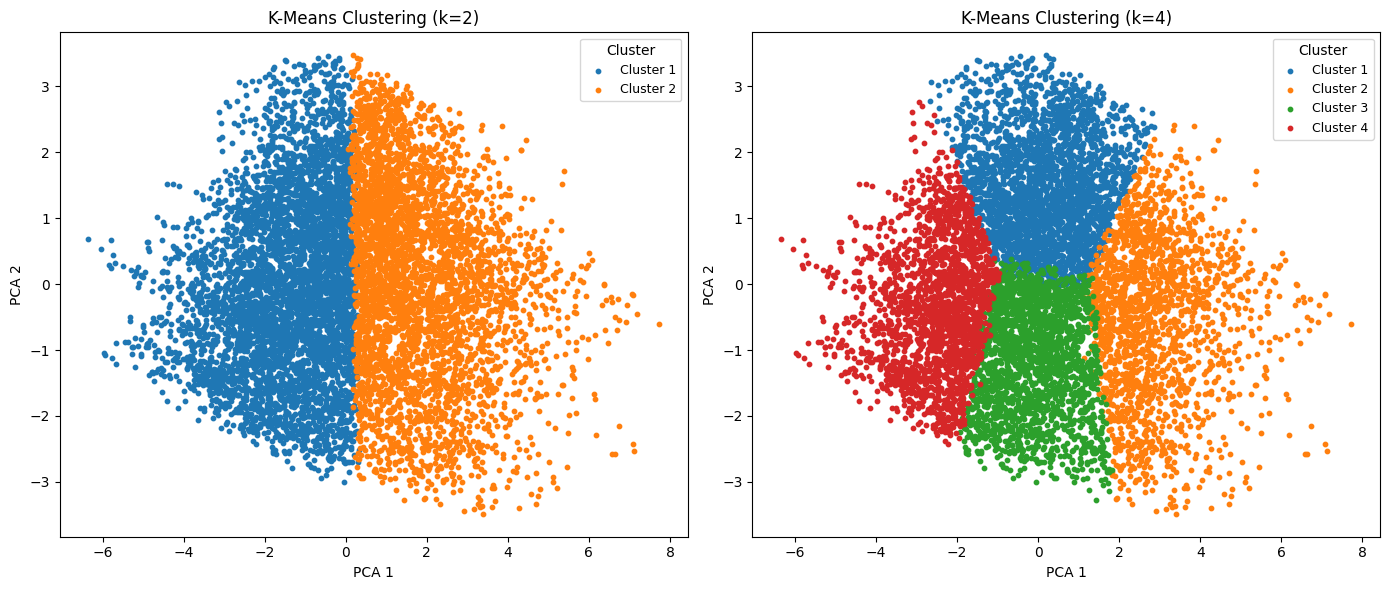

In [36]:
kmeans2 = KMeans(n_clusters=2, random_state=42)
labels2 = kmeans2.fit_predict(X_scaled)

kmeans4 = KMeans(n_clusters=4, random_state=42)
labels4 = kmeans4.fit_predict(X_scaled)

# --- Color palettes ---
colors2 = plt.cm.tab10(np.arange(2))
colors4 = plt.cm.tab10(np.arange(4))

# --- Create side-by-side plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ===== Left: k=2 =====
for i, color in zip(range(2), colors2):
    axes[0].scatter(
    X_pca[labels2 == i, 0],
    X_pca[labels2 == i, 1],
    s=10, color=color, label=f'Cluster {i+1}'
    )
axes[0].set_title('K-Means Clustering (k=2)')
axes[0].set_xlabel('PCA 1')
axes[0].set_ylabel('PCA 2')
axes[0].legend(title='Cluster', loc='best', fontsize=9)

# ===== Right: k=4 =====
for i, color in zip(range(4), colors4):
    axes[1].scatter(
        X_pca[labels4 == i, 0],
        X_pca[labels4 == i, 1],
        s=10, color=color, label=f'Cluster {i+1}'
    )
axes[1].set_title('K-Means Clustering (k=4)')
axes[1].set_xlabel('PCA 1')
axes[1].set_ylabel('PCA 2')
axes[1].legend(title='Cluster', loc='best', fontsize=9)

plt.tight_layout()
plt.show()

In [37]:
df_clean = X.copy()  # already cleaned & scaled before
df_clean['cluster'] = labels4  # use the cluster labels from k=4
cluster_summary = df_clean.groupby('cluster').mean()
print(cluster_summary)

         PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
cluster                                                                        
0        1034.562544     921.239072    838.945836   1575.553897   887.987918   
1        1420.262259    1321.936993    564.333469   1866.990175  1585.871237   
2        1124.279373     923.405867    756.175590   1308.389859  1109.155752   
3         884.627091     649.094873   1143.650635   1096.401603   627.892503   

                 T         RH        AH  
cluster                                  
0        27.348051  38.277360  1.300523  
1        19.307946  52.558532  1.159833  
2        11.760543  59.229454  0.835924  
3        12.282013  50.590912  0.742271  


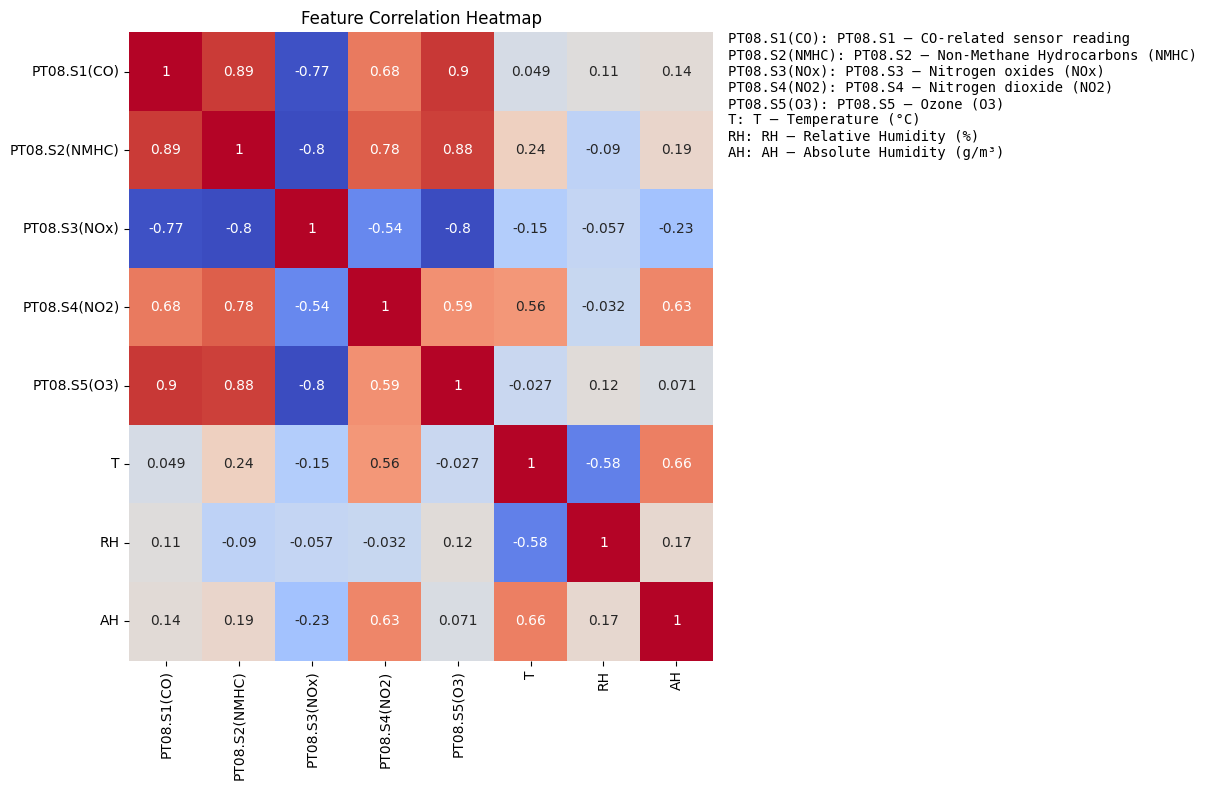

In [38]:
# build correlation matrix from sensor features only
corr = df[features].replace(-200, np.nan).corr()

fig, (ax_hm, ax_leg) = plt.subplots(1, 2, figsize=(12,8), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax_hm, cbar=False)
ax_hm.set_title('Feature Correlation Heatmap')

label_map = {
    'PT08.S1(CO)': 'PT08.S1 — CO-related sensor reading',
    'PT08.S2(NMHC)': 'PT08.S2 — Non‑Methane Hydrocarbons (NMHC)',
    'PT08.S3(NOx)': 'PT08.S3 — Nitrogen oxides (NOx)',
    'PT08.S4(NO2)': 'PT08.S4 — Nitrogen dioxide (NO2)',
    'PT08.S5(O3)': 'PT08.S5 — Ozone (O3)',
    'T': 'T — Temperature (°C)',
    'RH': 'RH — Relative Humidity (%)',
    'AH': 'AH — Absolute Humidity (g/m³)'
}

ax_leg.axis('off')
legend_text = "\n".join([f"{k}: {v}" for k, v in label_map.items()])
ax_leg.text(0, 1, legend_text, va='top', ha='left', fontsize=10, family='monospace')

plt.tight_layout()
plt.show()

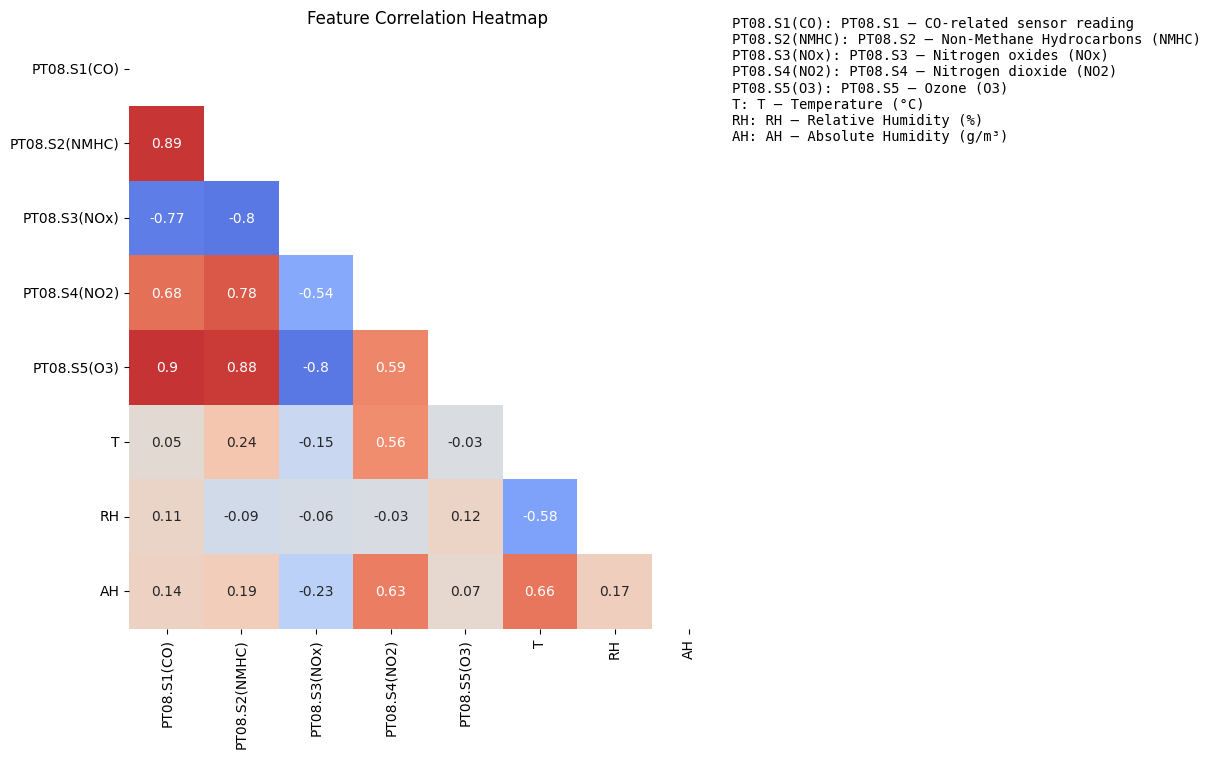

In [39]:
corr = df[features].replace(-200, np.nan).corr()

# mask upper triangle INCLUDING the diagonal (k=0) -> only strictly lower triangle shown
mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

# annotation only on strictly lower triangle (empty elsewhere)
annot = corr.round(2).astype(str)
annot = annot.where(~mask, '')

fig, (ax_hm, ax_leg) = plt.subplots(1, 2, figsize=(12,8), gridspec_kw={'width_ratios': [3, 1]})
sns.heatmap(corr, mask=mask, annot=annot, cmap='coolwarm', ax=ax_hm, cbar=False, vmin=-1, vmax=1, square=True, fmt='')
ax_hm.set_title('Feature Correlation Heatmap')

label_map = {
    'PT08.S1(CO)': 'PT08.S1 — CO-related sensor reading',
    'PT08.S2(NMHC)': 'PT08.S2 — Non‑Methane Hydrocarbons (NMHC)',
    'PT08.S3(NOx)': 'PT08.S3 — Nitrogen oxides (NOx)',
    'PT08.S4(NO2)': 'PT08.S4 — Nitrogen dioxide (NO2)',
    'PT08.S5(O3)': 'PT08.S5 — Ozone (O3)',
    'T': 'T — Temperature (°C)',
    'RH': 'RH — Relative Humidity (%)',
    'AH': 'AH — Absolute Humidity (g/m³)'
}

ax_leg.axis('off')
legend_text = "\n".join([f"{k}: {v}" for k, v in label_map.items()])
ax_leg.text(0, 1, legend_text, va='top', ha='left', fontsize=10, family='monospace')

plt.tight_layout()
plt.show()